In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../raw_data/listings.csv')
df.head()

,zpid,price,address,bedrooms,bathrooms,livingArea,latitude,longitude
0,42576380,410000,"591 Southview Dr, Johnson City, TN 37601",4,2,2646,36.305230,-82.331154
1,42557790,289000,"210 Green Valley Dr, Johnson City, TN 37601",3,2,1786,36.379210,-82.371230
2,55767353,435000,"1001 Kennesaw Dr, Johnson City, TN 37615",3,3,2258,36.388912,-82.417930
3,42580172,389000,"1718 Concord St, Johnson City, TN 37604",3,3,1675,36.291817,-82.366660
4,42549177,10000,"186 Windsong Dr, Gray, TN 37615",4,3,2374,36.409283,-82.516640


In [8]:
df.isnull().sum()

zpid          0
price         0
address       0
bedrooms      0
bathrooms     0
livingArea    0
latitude      0
longitude     0
dtype: int64

In [22]:
df["price"] = pd.to_numeric(df["price"], errors="coerce").fillna(0).astype(int)
df["livingArea"] = pd.to_numeric(df["livingArea"], errors="coerce")

In [23]:
df = df[df["price"] < 2_000_000]
df = df[df["livingArea"] < 6000]

In [24]:
df.drop(columns='zpid').describe()

,price,bedrooms,bathrooms,livingArea,latitude,longitude
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.938472e+05,3.325000,2.600000,2159.100000,36.351009,-82.389164
std,2.397453e+05,0.828576,0.900142,875.399097,0.050280,0.056842
min,1.000000e+04,2.000000,1.000000,720.000000,36.247036,-82.516640
25%,2.850000e+05,3.000000,2.000000,1693.750000,36.313638,-82.417810
50%,3.549500e+05,3.000000,2.500000,2058.000000,36.344878,-82.381245
75%,4.540000e+05,4.000000,3.000000,2455.000000,36.394504,-82.361158
max,1.650000e+06,6.000000,6.000000,5923.000000,36.436240,-82.284220


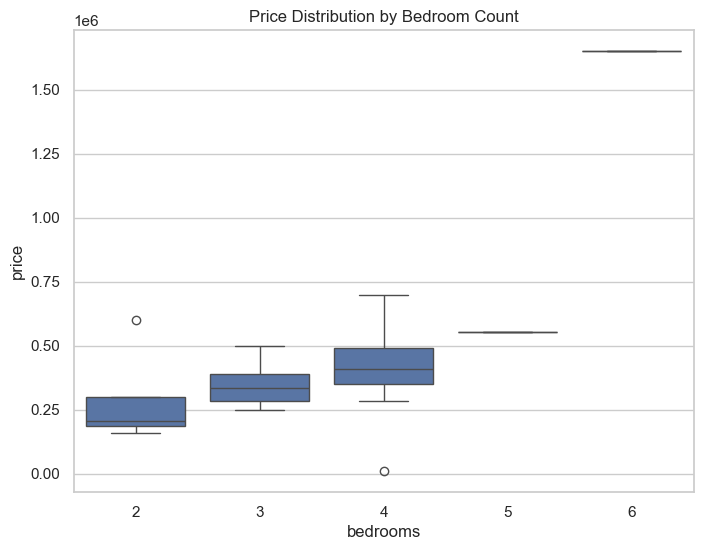

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price Distribution by Bedroom Count")
plt.savefig("../img/price_by_bedrooms.png")
plt.show()

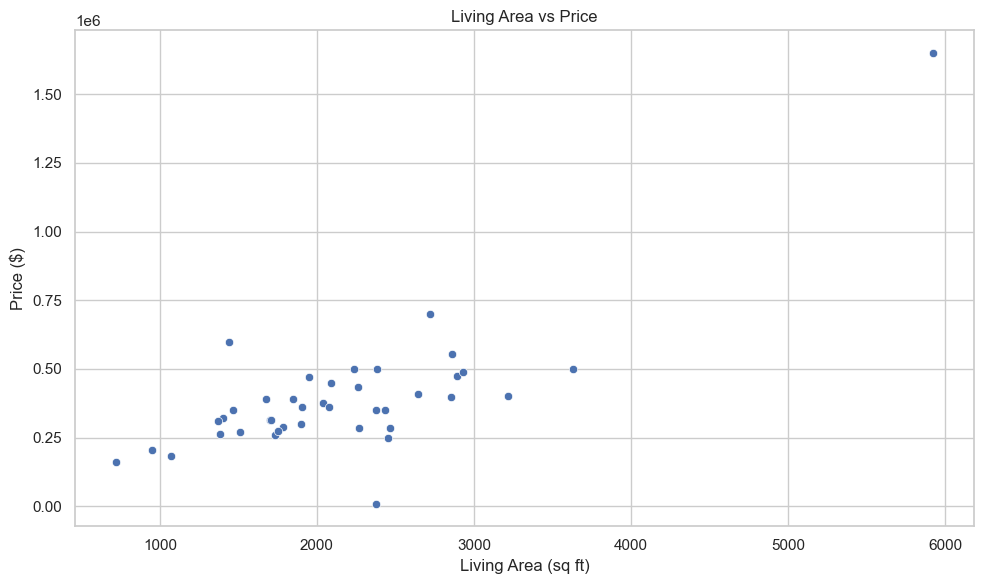

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="livingArea", y="price", data=df)
plt.title("Living Area vs Price")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.savefig("../img/livingarea_vs_price_fixed.png")
plt.show()